In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glasspy.predict import GlassNet
from glasspy.data import SciGlass
from functools import partial
 
from funcoes import cria_populacao_compostos as cria_populacao
from funcoes import funcao_objetivo_pop as funcao_objetivo_pop
from funcoes import selecao_torneio_min as funcao_selecao
from funcoes import cruzamento_ponto_duplo as funcao_cruzamento
from funcoes import mutacao_sucessiva as funcao_mutacao_1
from funcoes import mutacao_simples as funcao_mutacao_2
from funcoes import mutacao_troca as funcao_mutacao_3

In [28]:
df_compounds_and_prices = pd.read_csv('../analise_exploratoria/Prices.csv',sep=',')

COMPOUNDS = list(df_compounds_and_prices['Oxide Coumpounds'])
PRECOS = list(df_compounds_and_prices['Price per gram(dolar/gram)'])
NUM_COMPOUNDS = len(COMPOUNDS)
VALOR_MAX_COMPOUNDS = 100

TAMANHO_POPULACAO = 300
NUM_GERACOES = 10
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.05
CHANCE_DE_MUTACAO_POR_GENE = 0.25
TAMANHO_TORNEIO = 3

In [29]:
#source = SciGlass()
MODEL = GlassNet()

funcao_objetivo = partial(funcao_objetivo_pop, lista_de_compostos=COMPOUNDS, lista_de_precos=PRECOS, modelo=MODEL)

In [30]:
populacao = cria_populacao(TAMANHO_POPULACAO, NUM_COMPOUNDS, VALOR_MAX_COMPOUNDS)

hall_da_fama = []

geracoes = np.arange(1,NUM_GERACOES+1,1)
melhores_das_geracoes = []

for n in range(NUM_GERACOES):
    print(f'Geração {n}', end='\r') 
    
    # Seleção
    fitness = funcao_objetivo(populacao)        
    selecionados = funcao_selecao(populacao, fitness, TAMANHO_TORNEIO)
    
    # Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)
    
    # Mutação
    funcao_mutacao_1(proxima_geracao, CHANCE_DE_MUTACAO, CHANCE_DE_MUTACAO_POR_GENE, VALOR_MAX_COMPOUNDS)
    funcao_mutacao_2(proxima_geracao, CHANCE_DE_MUTACAO, VALOR_MAX_COMPOUNDS)
    funcao_mutacao_3(proxima_geracao, CHANCE_DE_MUTACAO)
        
    # Atualização do hall da fama
    fitness = funcao_objetivo(proxima_geracao)
        
    menor_fitness = min(fitness)
    indice = fitness.index(menor_fitness)
    hall_da_fama.append(proxima_geracao[indice])    
    melhores_das_geracoes.append(menor_fitness)
    # Encerramento
    populacao = proxima_geracao
    
    
fitness = funcao_objetivo(hall_da_fama)
menor_fitness = min(fitness)
indice = fitness.index(menor_fitness)
melhor_individuo_observado = hall_da_fama[indice]

melhor_individuo_observado

[0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [31]:
dict_composition = dict(zip(COMPOUNDS, melhor_individuo_observado))
display(dict_composition)
predicao = MODEL.predict(dict_composition)
predicao

{'SiO2': 0,
 'P2O5': 0,
 'ZrO2': 0,
 'Na2O': 0,
 'Al2O3': 2,
 'Fe2O3': 0,
 'CaO': 0,
 'MgO': 0,
 'MnO': 0,
 'GeO2': 0,
 'Li2O': 0,
 'Ta2O5': 0,
 'ZnO': 0,
 'SrO': 0,
 'CdO': 0,
 'SnO2': 0,
 'B2O3': 0,
 'La2O3': 0,
 'Ga2O3': 0,
 'Y2O3': 0,
 'TiO2': 0,
 'Nb2O5': 0,
 'PbO': 0,
 'HfO2': 0,
 'WO3': 0,
 'Sb2O3': 0,
 'Bi2O3': 0,
 'BaO': 0,
 'Cr2O3': 0,
 'Cu2O': 0,
 'BeO': 0,
 'CuO': 0,
 'Nd2O3': 0,
 'CeO2': 0,
 'Cs2O': 0,
 'As2O3': 0,
 'NH4NO3': 0,
 'MoO3': 0,
 'FeO': 0,
 'Mn2O3': 0,
 'SO2': 0,
 'Ag2O': 0,
 'TeO2': 0,
 'CoO': 0,
 'In2O3': 0,
 'Sc2O3': 0,
 'NiO': 0,
 'V2O5': 0,
 'Li2SO4': 0,
 'As2O5': 0,
 'MnO2': 0,
 'Sm2O3': 0,
 'Gd2O3': 0,
 'Tb2O3': 0,
 'Dy2O3': 0,
 'Ho2O3': 0,
 'Er2O3': 0,
 'Yb2O3': 0,
 'Co3O4': 0,
 'Fe3O4': 0,
 'SnO': 0,
 'Mn3O4': 0,
 'Pr2O3': 0,
 'CrO3': 0,
 'Na2SO4': 0,
 'Pr6O11': 0,
 'Co2O3': 0,
 'Ti2O3': 0,
 '(NH4)2SO4': 0,
 'K2SO4': 0,
 'Cs2SO4': 0,
 'Eu2O3': 0,
 'SeO2': 0,
 'Lu2O3': 0,
 'BiOCl': 0,
 'ZnSO4': 0,
 'HgO': 0,
 'Tm2O3': 0,
 'PbSO4': 0,
 'BaSO4': 0,
 'La2(

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,Cp1673K,TMaxGrowthVelocity,MaxGrowthVelocity,CrystallizationPeak,CrystallizationOnset,SurfaceTensionAboveTg,SurfaceTension1173K,SurfaceTension1473K,SurfaceTension1573K,SurfaceTension1673K
0,1952.052788,1822.39931,1688.51556,1582.75676,1508.300711,1416.400004,1313.388781,1270.374681,1211.818043,1205.705061,...,1895.957729,1691.414078,-2.714815,1136.818199,1201.35406,0.511394,0.245589,0.33691,0.404689,0.390338


In [32]:
#sorted(list(dict_composition.values()))

In [33]:
compostos_usados = len(list(dict_composition.values())) - (list(dict_composition.values())).count(0)

print(f"{compostos_usados}/{len(COMPOUNDS)} compostos utilizados")

1/126 compostos utilizados


In [34]:
from funcoes import preco_composicao

preco = preco_composicao(melhor_individuo_observado, PRECOS)

print(f"Preço: {preco}")
print(f"Módulo de Young: {float(predicao['YoungModulus'].iloc[0])}")
print(f"Microdureza: {float(predicao['Microhardness'].iloc[0])}")

Preço: 0.0657
Módulo de Young: 173.52607712153676
Microdureza: 12.068852318787737


In [35]:
df_compounds_and_prices['Price per gram(dolar/gram)'].describe()

count    126.000000
mean      19.570842
std       65.880195
min        0.022800
25%        0.502725
50%        2.820000
75%       10.550000
max      593.000000
Name: Price per gram(dolar/gram), dtype: float64

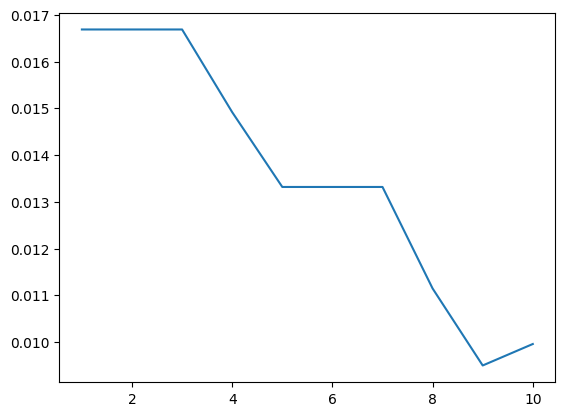

In [36]:
plt.plot(geracoes,melhores_das_geracoes)

In [37]:
populacao_valores = []
for i in populacao:
    if sum(i) 
    populacao_valores.append(sum(i))

In [38]:
desvio_padrao_populacao = np.std(populacao_valores)

desvio_padrao_populacao

25.888065890590504